In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pesticides_data= pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\crop yield prediction\pesticides.csv")
rainfall_data = pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\crop yield prediction\rainfall.csv")
temp_data = pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\crop yield prediction\temp.csv")
yield_data = pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\crop yield prediction\yield.csv")

In [3]:
rainfall_data.head()

,Area,year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [4]:
len(rainfall_data['Area'].unique())

217

In [6]:
len(rainfall_data['year'].unique())

31

In [7]:
rainfall_df = rainfall_data.groupby(['year','Area'], as_index = False, axis =0).sum()
rainfall_df

,year,Area,average_rain_fall_mm_per_year
0,1985,Afghanistan,327
1,1985,Albania,1485
2,1985,Algeria,89
3,1985,American Samoa,0
4,1985,Andorra,1010
...,...,...,...
6722,2017,Virgin Islands (U.S.),0
6723,2017,West Bank and Gaza,402
6724,2017,Yemen,167
6725,2017,Zambia,1020


In [8]:
temp_data.head()

,year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [9]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
len(temp_data['year'].unique())

271

In [11]:
len(temp_data['Area'].unique())

137

In [12]:
temp_df= temp_data.groupby(['year','Area'], as_index = False,axis = 0).mean()
temp_df

,year,Area,avg_temp
0,1743,Albania,12.690
1,1743,Austria,4.110
2,1743,Belarus,0.230
3,1743,Belgium,7.520
4,1743,Bosnia And Herzegovina,4.980
...,...,...,...
28509,2013,Uzbekistan,13.660
28510,2013,Venezuela,26.598
28511,2013,Vietnam,25.780
28512,2013,Zambia,20.140


In [13]:
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [14]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [15]:
yield_df  = yield_data.drop(['Domain','Element'], axis = 1)
yield_df

,Domain Code,Area Code,Area,Element Code,Item Code,Item,Year Code,year,Unit,Value
0,QC,2,Afghanistan,5419,56,Maize,1961,1961,hg/ha,14000
1,QC,2,Afghanistan,5419,56,Maize,1962,1962,hg/ha,14000
2,QC,2,Afghanistan,5419,56,Maize,1963,1963,hg/ha,14260
3,QC,2,Afghanistan,5419,56,Maize,1964,1964,hg/ha,14257
4,QC,2,Afghanistan,5419,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...
56712,QC,181,Zimbabwe,5419,15,Wheat,2012,2012,hg/ha,24420
56713,QC,181,Zimbabwe,5419,15,Wheat,2013,2013,hg/ha,22888
56714,QC,181,Zimbabwe,5419,15,Wheat,2014,2014,hg/ha,21357
56715,QC,181,Zimbabwe,5419,15,Wheat,2015,2015,hg/ha,19826


In [16]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   PValue   4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [17]:
pesticides_df = pesticides_data.drop(['Domain','Element'], axis = 1)
pesticides_df

,Area,Item,year,Unit,PValue
0,Albania,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Albania,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Albania,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Albania,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Albania,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...
4344,Zimbabwe,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Zimbabwe,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Zimbabwe,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Zimbabwe,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [19]:
rain_temp_df = pd.merge(rainfall_df,temp_df, on=['Area','year'])
rain_temp_yield_df = pd.merge(rain_temp_df,yield_df,on=['Area','year'])
rain_temp_yield_pest_df=pd.merge(rain_temp_yield_df,pesticides_df, on =['Area','year'])
data = rain_temp_yield_pest_df[['year', 'Area', 'average_rain_fall_mm_per_year', 'avg_temp', 'PValue', 'Value']]

In [20]:
data.head()

,year,Area,average_rain_fall_mm_per_year,avg_temp,PValue,Value
0,1990,Albania,1485,16.37,121.0,36613
1,1990,Albania,1485,16.37,121.0,66667
2,1990,Albania,1485,16.37,121.0,23333
3,1990,Albania,1485,16.37,121.0,12500
4,1990,Albania,1485,16.37,121.0,7000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13136 entries, 0 to 13135
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           13136 non-null  int64  
 1   Area                           13136 non-null  object 
 2   average_rain_fall_mm_per_year  13136 non-null  object 
 3   avg_temp                       13136 non-null  float64
 4   PValue                         13136 non-null  float64
 5   Value                          13136 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 718.4+ KB


In [24]:
data.rename(columns={'average_rain_fall_mm_per_year':'avg_rain'}, inplace = True)

C:\Users\afroz\AppData\Local\Temp\ipykernel_5172\2394763786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'average_rain_fall_mm_per_year':'avg_rain'}, inplace = True)


In [25]:
data['avg_rain'].isnull().sum()

0

In [27]:
data = data[data['avg_rain'].str.isnumeric()]
data['avg_rain'] = data['avg_rain'].astype(float)


C:\Users\afroz\AppData\Local\Temp\ipykernel_5172\105316076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_rain'] = data['avg_rain'].astype(float)


In [28]:
data['avg_rain'] = pd.to_numeric(data['avg_rain'], errors='coerce')

C:\Users\afroz\AppData\Local\Temp\ipykernel_5172\1822798595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_rain'] = pd.to_numeric(data['avg_rain'], errors='coerce')


In [29]:
data['avg_rain'].info()

<class 'pandas.core.series.Series'>
Int64Index: 13130 entries, 0 to 13135
Series name: avg_rain
Non-Null Count  Dtype  
--------------  -----  
13130 non-null  float64
dtypes: float64(1)
memory usage: 205.2 KB


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13130 entries, 0 to 13135
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      13130 non-null  int64  
 1   Area      13130 non-null  object 
 2   avg_rain  13130 non-null  float64
 3   avg_temp  13130 non-null  float64
 4   PValue    13130 non-null  float64
 5   Value     13130 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 718.0+ KB


In [31]:
len(data.Area.unique())

101

In [32]:
len(data.year.unique())

23

# data exploration 

AttributeError: 'AxesSubplot' object has no attribute 'show'

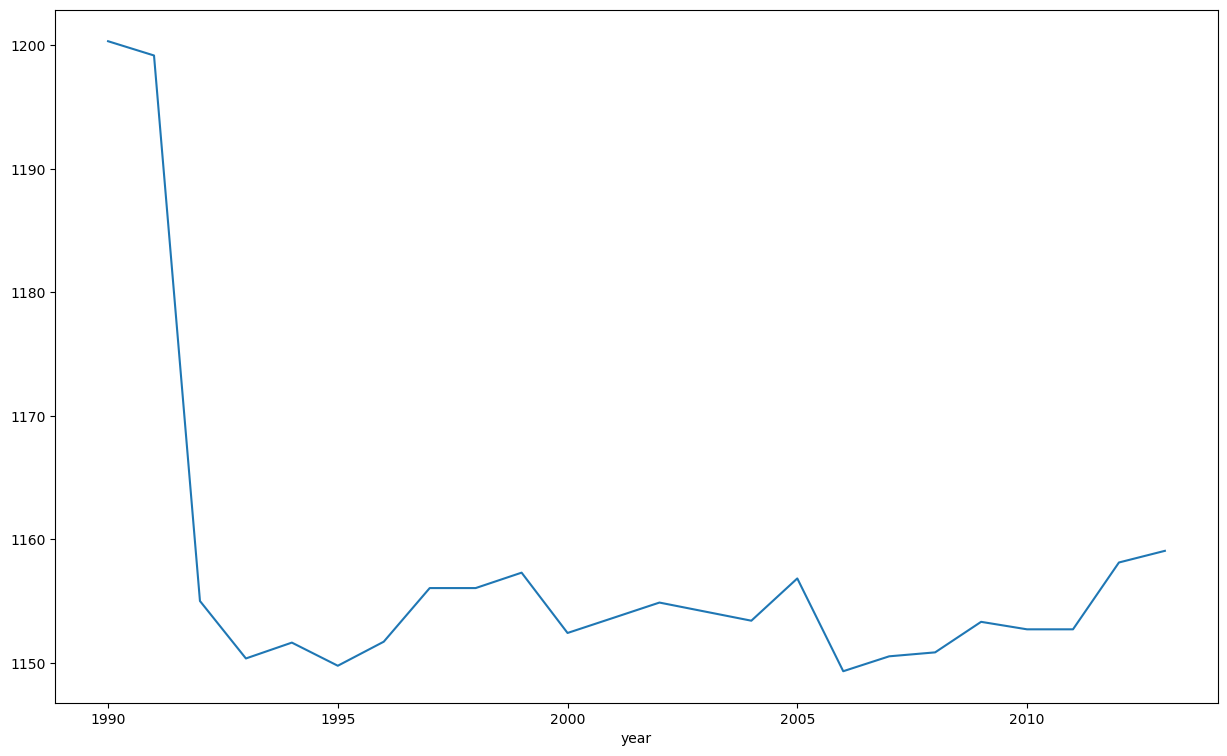

In [45]:
#average rainfall across countries time series graph

temp_data = data['avg_rain'].groupby(data['year']).mean()
temp_data.plot(figsize=(15,9))
xlabel='avg_rainfall in mm'
ylabel = 'year'
plt.show()

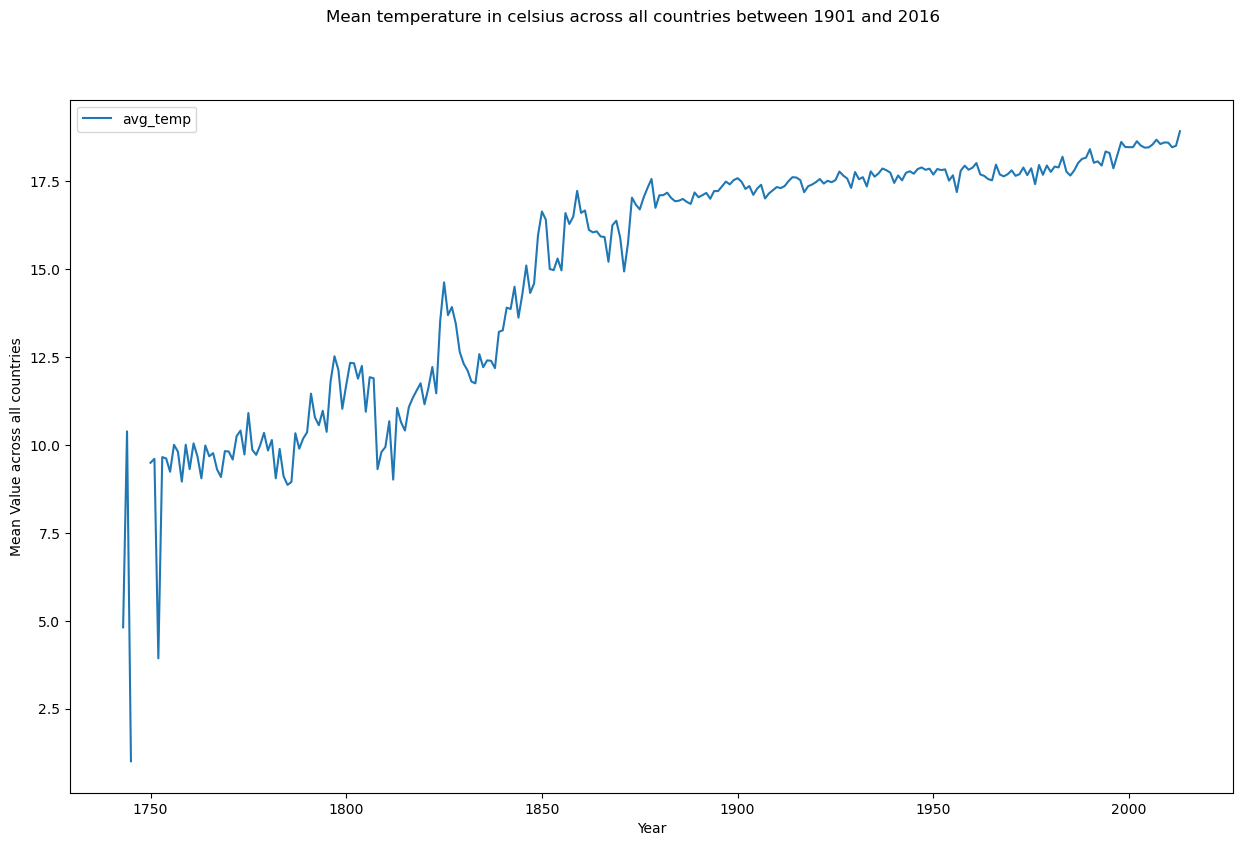

In [41]:
temp_data = temp_df.groupby('year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

In [51]:
temp_data = data['avg_temp'].groupby(data['year']).mean()

NameError: name 'plot' is not defined

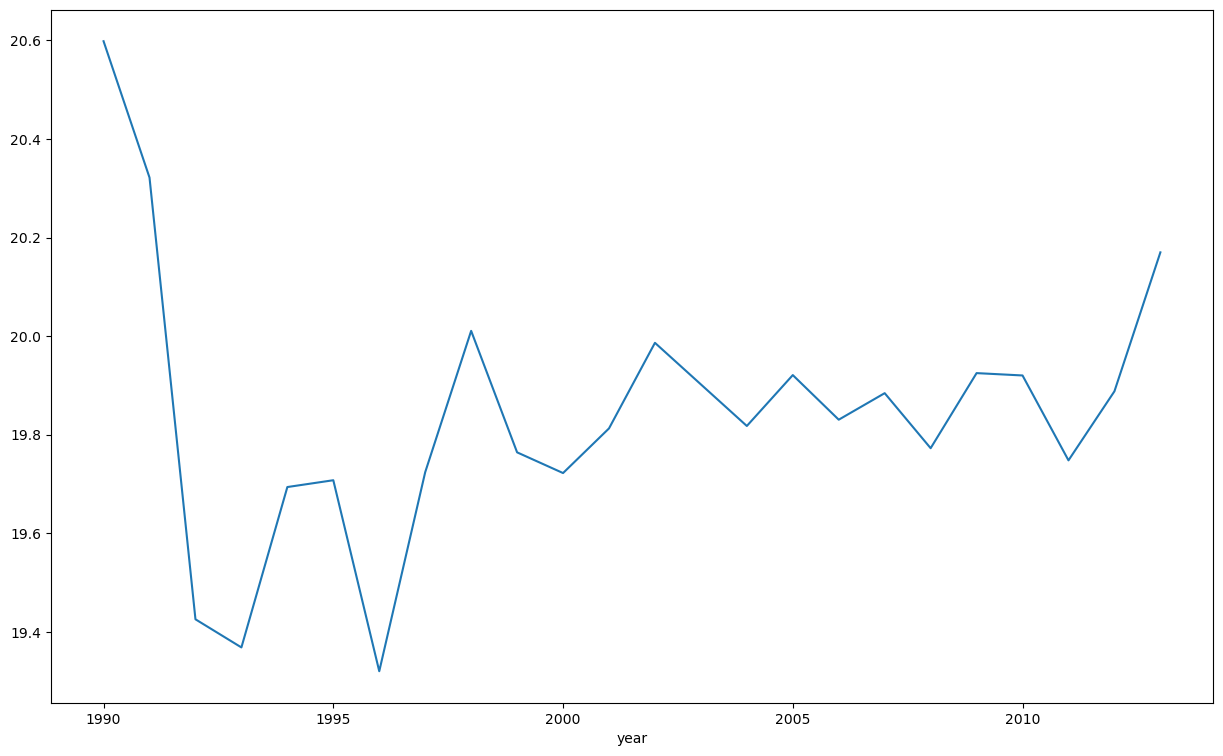

In [52]:
temp_data.plot(figsize=(15,9))
xlabel = 'rainfall in mm'
ylabel ='year'
plot.show()

In [58]:
# prepare data
yield_mean = yield_df.groupby(['year', 'Item']).mean()

# plot data

fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'subplot'

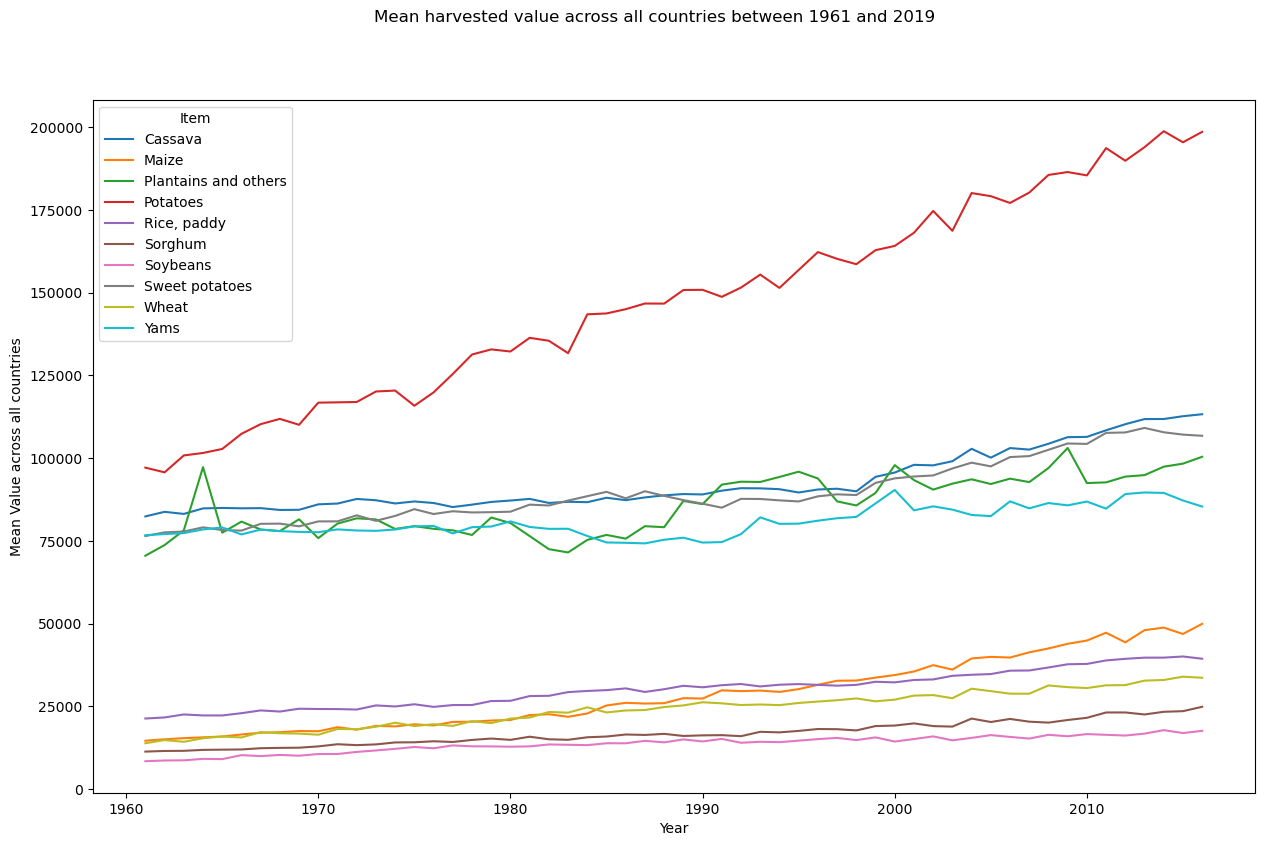

In [60]:


# prepare data
yield_mean = yield_df.groupby(['year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

# Add legend
ax.legend(title='Item')

plt.show()
